In [295]:
import pandas as pd
from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
import pydotplus
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
import numpy as np

In [296]:
diabetes_df = pd.read_csv("diabetes.csv")
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [190]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

#Standardize
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [136]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state =42)
#what is an estimator?  models

rf = rf.fit(X_train, y_train)
print(rf.score(X_train, y_train))

print(rf.score(X_test, y_test))

y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

1.0
0.7532467532467533
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       100
           1       0.67      0.57      0.62        54

    accuracy                           0.75       154
   macro avg       0.73      0.71      0.72       154
weighted avg       0.75      0.75      0.75       154



### Hyper parameter tuning:

1. Write simple (straightforward) definitions for the following parameters for
RandomForestClassifier
(https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) and indicate how they correlate with the precision and recall for the basic
diabetes model we built in class. You will need to rerun the model multiple times to do
so.

#### Estimator:

In [245]:
estim_pre=[]
estim_rec=[]
for x in range(10,1000):
    rf = RandomForestClassifier(random_state =42,n_estimators=x)
    rf = rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    temp=classification_report(y_test, y_pred,output_dict=True)
    estim_pre.append(temp['weighted avg']['precision'])
    estim_rec.append(temp['weighted avg']['recall'])

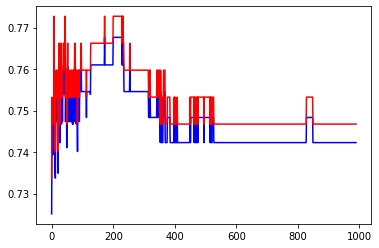

In [246]:
plt.plot(estim_pre,color='b')
plt.plot(estim_rec,color='r')

#### max_depth:

In [249]:
depth_pre=[]
depth_rec=[]
for x in range(2,50):
    rf = RandomForestClassifier(random_state =42,max_depth=x)
    rf = rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    temp=classification_report(y_test, y_pred,output_dict=True)
    depth_pre.append(temp['weighted avg']['precision'])
    depth_rec.append(temp['weighted avg']['recall'])

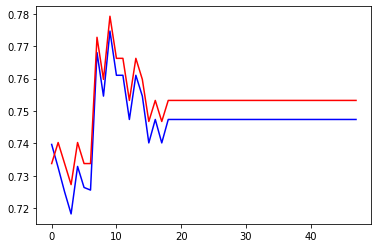

In [250]:
plt.plot(depth_pre,color='b')
plt.plot(depth_rec,color='r')

#### min_samples_split:

In [251]:
minsam_pre=[]
minsam_rec=[]
for x in range(2,50):
    rf = RandomForestClassifier(random_state =42,min_samples_split=x)
    rf = rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    temp=classification_report(y_test, y_pred,output_dict=True)
    minsam_pre.append(temp['weighted avg']['precision'])
    minsam_rec.append(temp['weighted avg']['recall'])

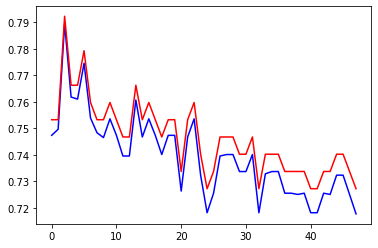

In [252]:
plt.plot(minsam_pre,color='b')
plt.plot(minsam_rec,color='r')

### min_samples_leaf:

In [253]:
minsamleaf_pre=[]
minsamleaf_rec=[]
for x in range(1,50):
    rf = RandomForestClassifier(random_state =42,min_samples_leaf=x)
    rf = rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    temp=classification_report(y_test, y_pred,output_dict=True)
    minsamleaf_pre.append(temp['weighted avg']['precision'])
    minsamleaf_rec.append(temp['weighted avg']['recall'])

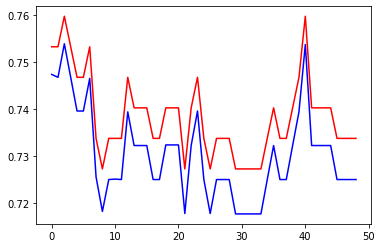

In [255]:
plt.plot(minsamleaf_pre,color='b')
plt.plot(minsamleaf_rec,color='r')

#### min_weight_fraction_leaf:

In [322]:
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [323]:
templist= np.linspace(0,0.5,5)
templist

array([0.   , 0.125, 0.25 , 0.375, 0.5  ])

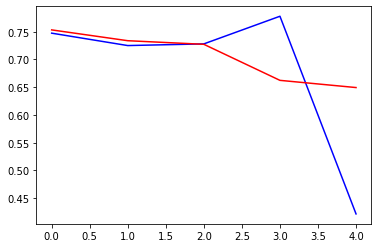

In [324]:
minwtl_pre=[]
minwtl_rec=[]
for x in templist:
    rf = RandomForestClassifier(random_state =42,min_weight_fraction_leaf=x)
    rf = rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    temp=classification_report(y_test, y_pred,output_dict=True)
    minwtl_pre.append(temp['weighted avg']['precision'])
    minwtl_rec.append(temp['weighted avg']['recall'])

plt.plot(minwtl_pre,color='b')
plt.plot(minwtl_rec,color='r')

#### max_leaf_nodes : 

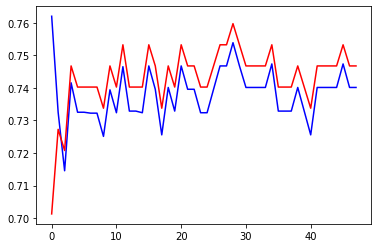

In [270]:
minnode_pre=[]
minnode_rec=[]
for x in range(2,50):
    rf = RandomForestClassifier(random_state =42,max_leaf_nodes=x)
    rf = rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    temp=classification_report(y_test, y_pred,output_dict=True)
    minnode_pre.append(temp['weighted avg']['precision'])
    minnode_rec.append(temp['weighted avg']['recall'])

    
plt.plot(minnode_pre,color='b')
plt.plot(minnode_rec,color='r')

#### min_impurity_decrease:

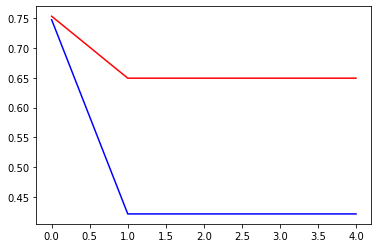

In [331]:
minimpdec_pre=[]
minimpdec_rec=[]
for x in templist:
    rf = RandomForestClassifier(random_state =42,min_impurity_decrease=x)
    rf = rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    temp=classification_report(y_test, y_pred,output_dict=True)
    minimpdec_pre.append(temp['weighted avg']['precision'])
    minimpdec_rec.append(temp['weighted avg']['recall'])

    
plt.plot(minimpdec_pre,color='b')
plt.plot(minimpdec_rec,color='r')

#### min_impurity_split :

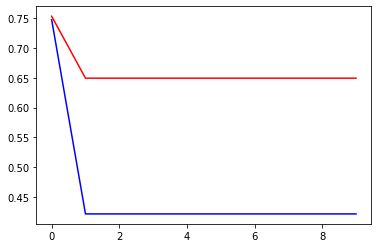

In [334]:
minss_pre=[]
minss_rec=[]
for x in range(0,10):
    rf = RandomForestClassifier(random_state =42,min_impurity_split=x)
    rf = rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    temp=classification_report(y_test, y_pred,output_dict=True)
    minss_pre.append(temp['weighted avg']['precision'])
    minss_rec.append(temp['weighted avg']['recall'])

    
plt.plot(minss_pre,color='b')
plt.plot(minss_rec,color='r')

| Parameter (on increase) | Correlation with Precission             | Correlation with Recall                       |
| ------------------------|-----------------------------------------| ----------------------------------------------|
| estimator               |increases then decreases and flattens out| increases then decreases and flattens out     |
| max_depth               |increases then decreases and flattens out| increases then decreases and flattens         |
| min_samples_split       |up and down pattern decreasing line      | up and down pattern decreasing line           |
| min_samples_leaf        | decreases then increases.               | decreases then increases                      |
| min_weight_fraction_leaf| slight up and down the decreases        | slight down then decreases.                   |
| max_leaf_nodes          | decreases  up and down                  | increases then up and down                    |
| min_impurity_decrease   | decreases and flatness                  | decreases and flatness  but recall is better  |
| min_impurity_split      | decreases and flatness                  | decreases and flatness  but recall is better  |

#### 2. How does setting bootstrap=False influence the model performance? Note: the default isbootstrap=True. Explain why your results might be so.

#### Bootstrap = True 

In [297]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state =42,bootstrap=False)
#what is an estimator?  models

rf = rf.fit(X_train, y_train)
print(rf.score(X_train, y_train))
print(rf.score(X_test, y_test))

y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

1.0
0.7467532467532467
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       100
           1       0.65      0.59      0.62        54

    accuracy                           0.75       154
   macro avg       0.72      0.71      0.72       154
weighted avg       0.74      0.75      0.74       154



#### Bootstrap = False

In [299]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state =42,bootstrap=False)
#what is an estimator?  models

rf = rf.fit(X_train, y_train)
print("Training accuracy:",round(rf.score(X_train, y_train),3))
print("Testing accuracy:",round(rf.score(X_test, y_test),3))
print("")
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

Training accuracy: 1.0
Testing accuracy: 0.747

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       100
           1       0.65      0.59      0.62        54

    accuracy                           0.75       154
   macro avg       0.72      0.71      0.72       154
weighted avg       0.74      0.75      0.74       154



#### On setting bootstrap to false it is observed that the precision has reduced by 1% and there is no change in recall.

#### changing hyper parameters for performance tuning: 

In [321]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state =42,bootstrap=False,max_depth=10)
#what is an estimator?  models

rf = rf.fit(X_train, y_train)
print("Training accuracy:",round(rf.score(X_train, y_train),3))
print("Testing accuracy:",round(rf.score(X_test, y_test),3))
print("")
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

Training accuracy: 0.997
Testing accuracy: 0.773

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       100
           1       0.69      0.63      0.66        54

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.77      0.77      0.77       154



#### On changing depth to 10 acquired better performance.